# Data Collection and Preperation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date, time
import pickle

 ## Bikesharing Rentals Data

The dataset contains data by Bikeshare Metro in Los Angeles of the year 2018. It contains the following variables: <br>
<br>
**start_time**: Day and time trip started [datetime]<br>
**end_time**: Day and time trip ended [datetime]<br>
**start_station_id**: Unique ID of station where trip originated [int]<br>
**end_station_id**: Unique ID of station where trip terminated [int]<br>
**bike_id**: Unique ID attached to each bike [int]<br>
**user_type**: User membership type [str]<br>
**start_station_name**: Name of station where trip originated [str]<br>
**end_station_name**: Name of station where trip terminated [str]<br>

### Import & Inspection before further Processing

In [2]:
df_LA = pd.read_csv('../data/LosAngeles/la_2018.csv') 

df_LA

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station
...,...,...,...,...,...,...,...,...
311889,2018-12-31 23:46:00,2018-12-31 23:55:00,3069,3069,6222,Walk-up,Broadway & 3rd,Broadway & 3rd
311890,2018-12-31 23:47:00,2018-12-31 23:54:00,3069,3069,5730,Walk-up,Broadway & 3rd,Broadway & 3rd
311891,2018-12-31 23:51:00,2019-01-01 01:28:00,4211,4210,12347,Walk-up,Pacific & North Venice,Ocean Front Walk & North Venice
311892,2018-12-31 23:54:00,2019-01-01 00:22:00,3005,3082,12128,Walk-up,7th & Flower,Traction & Rose


In [3]:
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311894 entries, 0 to 311893
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          311894 non-null  object
 1   end_time            311894 non-null  object
 2   start_station_id    311894 non-null  int64 
 3   end_station_id      311894 non-null  int64 
 4   bike_id             311894 non-null  int64 
 5   user_type           311894 non-null  object
 6   start_station_name  311894 non-null  object
 7   end_station_name    311894 non-null  object
dtypes: int64(3), object(5)
memory usage: 19.0+ MB


In [4]:
startLenght = len(df_LA)
print("We start with " + str(startLenght) + " entries.")

We start with 311894 entries.


## Preperation

### Duplicates

In [5]:
df_LA[df_LA.duplicated(keep=False)]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
12598,2018-01-19 13:48:00,2018-01-19 13:56:00,4213,4207,11972,Walk-up,7th & Westminster,Rose & 7th
12599,2018-01-19 13:48:00,2018-01-19 13:56:00,4213,4207,11972,Walk-up,7th & Westminster,Rose & 7th
12969,2018-01-20 00:11:00,2018-01-20 00:35:00,4213,4214,12048,Monthly Pass,7th & Westminster,Ocean Front Walk & Navy
12971,2018-01-20 00:11:00,2018-01-20 00:35:00,4213,4214,12048,Monthly Pass,7th & Westminster,Ocean Front Walk & Navy
12973,2018-01-20 00:18:00,2018-01-20 00:35:00,4213,4214,6589,Monthly Pass,7th & Westminster,Ocean Front Walk & Navy
...,...,...,...,...,...,...,...,...
194343,2018-08-20 05:23:00,2018-08-20 05:43:00,3014,3014,6312,Monthly Pass,Union Station West Portal,Union Station West Portal
198264,2018-08-23 23:36:00,2018-08-23 23:56:00,3038,3038,11980,Monthly Pass,Main & 5th,Main & 5th
198265,2018-08-23 23:36:00,2018-08-23 23:56:00,3038,3038,11980,Monthly Pass,Main & 5th,Main & 5th
242951,2018-10-05 16:23:00,2018-10-06 16:42:00,3038,3000,12370,Monthly Pass,Main & 5th,Virtual Station


First we delete all the duplicates by only keeping the last entry.

In [6]:
#drop duplicates and keep the last
df_LA = df_LA.drop_duplicates(keep='last')

We now have 311852 entries after removing 42 entries.

In [7]:
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311852 entries, 0 to 311893
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          311852 non-null  object
 1   end_time            311852 non-null  object
 2   start_station_id    311852 non-null  int64 
 3   end_station_id      311852 non-null  int64 
 4   bike_id             311852 non-null  int64 
 5   user_type           311852 non-null  object
 6   start_station_name  311852 non-null  object
 7   end_station_name    311852 non-null  object
dtypes: int64(3), object(5)
memory usage: 21.4+ MB


#### Only one Station ID for every Station Name

We want to ensure that every station_name is reffered to only one station_id and vice versa.

In [8]:
df_id = df_LA.sort_values(by=['bike_id','start_time'], ascending=True)

df_unique_id = df_id.groupby('start_station_id')['start_station_name'].nunique().reset_index()
df_unique_name = df_id.groupby('start_station_name')['start_station_id'].nunique().reset_index()

print(df_unique_id)
print(df_unique_name)

     start_station_id  start_station_name
0                3000                   1
1                3005                   1
2                3006                   1
3                3007                   1
4                3008                   1
..                ...                 ...
127              4266                   1
128              4267                   1
129              4273                   1
130              4275                   1
131              4276                   1

[132 rows x 2 columns]
               start_station_name  start_station_id
0                    11th & Maple                 1
1                     12th & Hill                 1
2    17th St / SMC E Line Station                 1
3                 18th & Figueroa                 1
4                18th & San Pedro                 1
..                            ...               ...
127        Waterfront Park (East)                 1
128        Waterfront Park (West)                 1
129 

In [9]:
print("Maximum number of station_ids assigned to one station_name: ", str(df_unique_id.start_station_name.max()))
print("Maximum number of station_names assigned to one station_id: ", str(df_unique_name.start_station_id.max()))

Maximum number of station_ids assigned to one station_name:  1
Maximum number of station_names assigned to one station_id:  1


We see that both printed values are "1". This implies, that there is only one station_id for every station_name and vice versa.

### Start Time, End Time and Trip Duration

Transforming the datetime into the right format.

In [10]:
#transform columns start_time and end_time into datetime
df_LA = df_LA.assign(start_time=pd.to_datetime(df_LA['start_time']))
df_LA = df_LA.assign(end_time=pd.to_datetime(df_LA['end_time']))

Adding a new column "trip_duration" by subtracting the "end_time" from the "start_time" for later analysis.

In [11]:
# calculate the total trip duration in hours
df_LA = df_LA.assign(trip_duration=df_LA['end_time'] - df_LA['start_time'])

# calculate the total trip duration in hours
df_LA = df_LA.assign(trip_duration_in_hours=df_LA.apply(lambda x: x['end_time'] - x['start_time'], axis=1) / pd.Timedelta(hours=1)
)


The new column "trip_duration" is now visible an contains the trip duration calculated from start_time and end_time.

In [12]:
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311852 entries, 0 to 311893
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   start_time              311852 non-null  datetime64[ns] 
 1   end_time                311852 non-null  datetime64[ns] 
 2   start_station_id        311852 non-null  int64          
 3   end_station_id          311852 non-null  int64          
 4   bike_id                 311852 non-null  int64          
 5   user_type               311852 non-null  object         
 6   start_station_name      311852 non-null  object         
 7   end_station_name        311852 non-null  object         
 8   trip_duration           311852 non-null  timedelta64[ns]
 9   trip_duration_in_hours  311852 non-null  float64        
dtypes: datetime64[ns](2), float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 26.2+ MB


In [13]:
df_LA.head(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,trip_duration_in_hours
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic,0 days 00:21:00,0.350000
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic,0 days 00:20:00,0.333333
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic,0 days 00:19:00,0.316667
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring,0 days 00:22:00,0.366667
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station,0 days 00:45:00,0.750000


#### Trip Duration Outliers

In order to sort out incorrect trip data or trips where the user has forgotten to return the bike, for example, we take a closer look at the trip lengths.

In [14]:
df_LA.sort_values(by=["trip_duration"], ascending=False).head(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,trip_duration_in_hours
306166,2018-12-22 14:20:00,2018-12-28 17:49:00,3033,3000,6134,Walk-up,Main & 9th,Virtual Station,6 days 03:29:00,147.483333
129398,2018-06-15 14:17:00,2018-06-21 14:55:00,3068,3048,12452,Walk-up,Grand & 3rd,5th & Hewitt,6 days 00:38:00,144.633333
61758,2018-03-27 18:12:00,2018-04-02 15:59:00,4162,3000,6248,Monthly Pass,Memorial Park Station,Virtual Station,5 days 21:47:00,141.783333
244953,2018-10-07 16:14:00,2018-10-13 10:13:00,4210,3000,6265,Walk-up,Ocean Front Walk & North Venice,Virtual Station,5 days 17:59:00,137.983333
306480,2018-12-23 02:51:00,2018-12-28 17:41:00,4204,3000,5917,Walk-up,Washington & Abbot Kinney,Virtual Station,5 days 14:50:00,134.833333


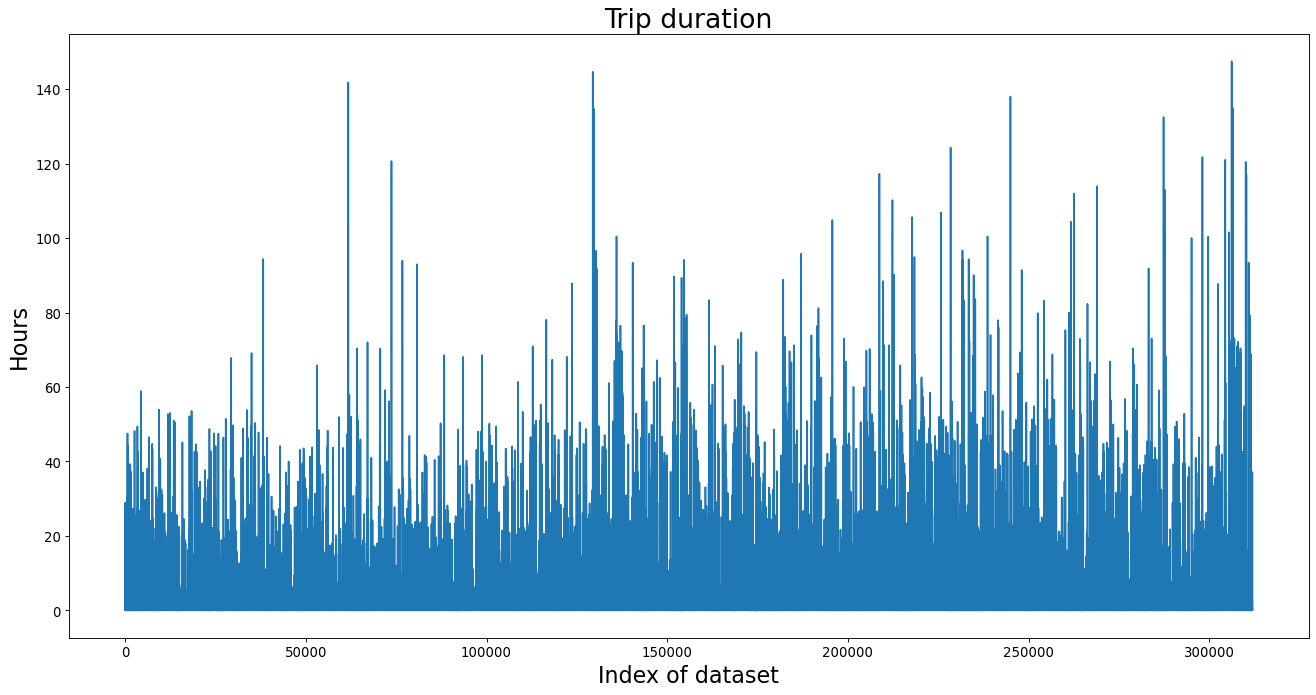

In [15]:
#plot trip duration
fig,ax = plt.subplots(figsize=(20,10), dpi= 80) 
axis_font = {'size':'20'}
label_font = {'labelsize':'12'}
dic={'fontsize': '24'}

ax.plot(df_LA['trip_duration_in_hours'], color = 'tab:blue')
ax.set_title("Trip duration", dic)
ax.set_ylabel('Hours',**axis_font)
ax.set_xlabel('Index of dataset',**axis_font)
ax.tick_params(axis='both', **label_font)
plt.show()

We saw that there are rides that are longer than 6 days. Now we want to have a look in which time range most of the rides are.

In [16]:
df_LA['trip_duration'].describe()

count                       311852
mean     0 days 00:46:06.946756794
std      0 days 03:26:21.131692415
min                0 days 00:01:00
25%                0 days 00:07:00
50%                0 days 00:13:00
75%                0 days 00:29:00
max                6 days 03:29:00
Name: trip_duration, dtype: object

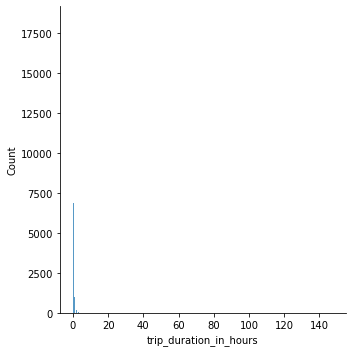

In [17]:
sns.displot(df_LA["trip_duration_in_hours"])

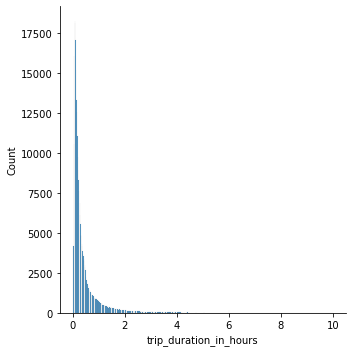

In [18]:
duration_temp = df_LA[df_LA["trip_duration_in_hours"] < 10]
sns.displot(duration_temp["trip_duration_in_hours"])

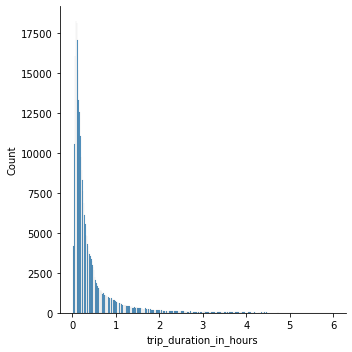

In [19]:
duration_temp = df_LA[df_LA["trip_duration_in_hours"] < 6]
sns.displot(duration_temp["trip_duration_in_hours"])

The graphs makes it seem like nearly all rides are shorter than 1/4 of a day, so 6 hours. We would like to confirm this assumption.

In [20]:
duration_temp = df_LA[df_LA["trip_duration_in_hours"] <= 6]
x = duration_temp.count() / df_LA.count()
x

start_time                0.984775
end_time                  0.984775
start_station_id          0.984775
end_station_id            0.984775
bike_id                   0.984775
user_type                 0.984775
start_station_name        0.984775
end_station_name          0.984775
trip_duration             0.984775
trip_duration_in_hours    0.984775
dtype: float64

Nearly 98,5% of all rides are less than 6 hours. Thus and because we generally consider 6 hours to be a legitimate maximum time for a bike rental we except all rides lager than 6 hours.

The maximal trip duration is now 6 hours.

In [21]:
df_LA = duration_temp
df_LA.describe()

,start_station_id,end_station_id,bike_id,trip_duration,trip_duration_in_hours
count,307104.000000,307104.000000,307104.000000,307104,307104.000000
mean,3405.155742,3402.700639,8308.347934,0 days 00:26:38.114645201,0.443921
std,537.681273,537.488847,2918.366120,0 days 00:39:54.564157888,0.665157
min,3000.000000,3000.000000,4727.000000,0 days 00:01:00,0.016667
25%,3030.000000,3030.000000,6084.000000,0 days 00:07:00,0.116667
50%,3063.000000,3062.000000,6480.000000,0 days 00:13:00,0.216667
75%,4162.000000,4162.000000,12097.000000,0 days 00:28:00,0.466667
max,4276.000000,4276.000000,15075.000000,0 days 06:00:00,6.000000


In [22]:
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307104 entries, 0 to 311893
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   start_time              307104 non-null  datetime64[ns] 
 1   end_time                307104 non-null  datetime64[ns] 
 2   start_station_id        307104 non-null  int64          
 3   end_station_id          307104 non-null  int64          
 4   bike_id                 307104 non-null  int64          
 5   user_type               307104 non-null  object         
 6   start_station_name      307104 non-null  object         
 7   end_station_name        307104 non-null  object         
 8   trip_duration           307104 non-null  timedelta64[ns]
 9   trip_duration_in_hours  307104 non-null  float64        
dtypes: datetime64[ns](2), float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 25.8+ MB


In [23]:
nowLenght = len(df_LA)
print("After removing these rides longer than 6 hours we have " +  str(nowLenght) + " entries left in the dataset.")

After removing these rides longer than 6 hours we have 307104 entries left in the dataset.


### Only one trip at the same time

We now want to make sure that for every bike only one ride is happening at the same time. We therefore sort the rides by bike_id and start_time to identify and drop all the worng rides.

In [24]:
df_id = df_LA.sort_values(by=['bike_id','start_time'], ascending=True)
temp = df_id[['start_time','end_time', 'bike_id']]

#add columns next_ride_start and next_bike_id which contain the shifted columns
temp = temp.assign(next_ride_start=0)
temp['next_ride_start']= temp['start_time'].shift(periods=-1)
temp = temp.assign(next_bike_id=0)
temp['next_bike_id']= temp['bike_id'].shift(periods=-1)

#compare the id (id_compare) to ensure, the next trip is with the same bike
#compare the start time of the next trip to the end time of the previos trip
temp['id_compare'] = temp.apply(lambda x: True if ((x['bike_id'] == x['next_bike_id'])) else False, axis=1)
temp = temp.dropna() #drop last row because of nan
temp['check'] = temp.apply(lambda x: True if ((x['next_ride_start'] >= x['end_time'])) else False, axis=1)

#Find wrong entrys in dataset
df_trips_same_time = temp[(temp['check']==False)&(temp['id_compare']==True)]
print('Wrong entrys: '+str(len(df_trips_same_time)))

Wrong entrys: 234


**Exapmle of wrong entrys:** 193634, 193636, 194167 <br> In the original dataframe (below) you can see, that the trips 193634, 193636 and 194167 are unrealistic. There are several rides happening at the same time with only one bike.

In [25]:
#df_trips_same_time dataframe
df_trips_same_time[(df_trips_same_time['bike_id']==5006)&(df_trips_same_time['start_time']>='2018-08-19 14:32:00')].head(5)

,start_time,end_time,bike_id,next_ride_start,next_bike_id,id_compare,check
193634,2018-08-19 14:32:00,2018-08-19 20:32:00,5006,2018-08-19 14:32:00,5006.0,True,False
193636,2018-08-19 14:32:00,2018-08-19 14:52:00,5006,2018-08-19 14:32:00,5006.0,True,False
194167,2018-08-19 20:32:00,2018-08-20 02:32:00,5006,2018-08-19 20:32:00,5006.0,True,False


In [26]:
#original dataframe
df_id[(df_id['bike_id']==5006)&(df_id['start_time']>='2018-08-19 14:32:00')].head(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,trip_duration_in_hours
193634,2018-08-19 14:32:00,2018-08-19 20:32:00,4126,4126,5006,Monthly Pass,Cabrillo Beach,Cabrillo Beach,0 days 06:00:00,6.000000
193636,2018-08-19 14:32:00,2018-08-19 14:52:00,4126,4131,5006,Monthly Pass,Cabrillo Beach,Downtown Harbor,0 days 00:20:00,0.333333
193637,2018-08-19 14:32:00,2018-08-19 14:52:00,4126,4126,5006,Monthly Pass,Cabrillo Beach,Cabrillo Beach,0 days 00:20:00,0.333333
194167,2018-08-19 20:32:00,2018-08-20 02:32:00,4126,4126,5006,Monthly Pass,Cabrillo Beach,Cabrillo Beach,0 days 06:00:00,6.000000
194168,2018-08-19 20:32:00,2018-08-19 20:52:00,4126,4131,5006,Monthly Pass,Cabrillo Beach,Downtown Harbor,0 days 00:20:00,0.333333


So now we drop all the wrong entrys:

In [27]:
#drop the found data from the df_LA
print('Entrys before this drop: ' + str(len(df_LA)))
droplist = list(df_trips_same_time.index)
droplist
df_LA = df_LA.drop(droplist)
print('Entrys after this drop: ' + str(len(df_LA)))

Entrys before this drop: 307104
Entrys after this drop: 306870


Drop all entrys which ar not in 2018

In [28]:
print('Entrys before this drop: ' + str(len(df_LA)))
df_LA = df_LA[(df_LA['start_time']>='2018-01-01 00:00:00')&(df_LA['end_time']<'2019-01-01 00:00:00')]
print('Entrys after this drop: ' + str(len(df_LA)))

Entrys before this drop: 306870
Entrys after this drop: 306863


Now we are done with the preparation of the data.

In [29]:
print("We startet with " + str(startLenght) + " entries.")
nowLenght = len(df_LA)
print("We ended with " + str(nowLenght) + " entries.")
droppedEntries = startLenght-nowLenght
print("This means we dropped " + str(droppedEntries) + " entries. Which are " + str(round((droppedEntries/startLenght)*100, 2)) + "% of all entries in the starting dataset.")

We startet with 311894 entries.
We ended with 306863 entries.
This means we dropped 5031 entries. Which are 1.61% of all entries in the starting dataset.


### Export

The last thing we have to do now is to export our cleaned data so that we can use it for further analysis.

In [30]:
df_LA.to_csv(r'../data/LA.csv', index = False)

In [31]:
#pickle write
outfile = open(r'../data/LA','wb')
pickle.dump(df_LA,outfile)
outfile.close()

The prepared dataframe is exportet to the designated folder.

### Geolocation Data of Bikesharing Stations

Read in the LA metro bike data parts and append all parts to one dataframe.

In [32]:
df_2018_q1 = pd.read_csv('../data/metro-bike-share-trips-2018-q1.csv')
df_2018_q2 = pd.read_csv('../data/metro-bike-share-trips-2018-q2.csv')
df_2018_q3 = pd.read_csv('../data/metro-bike-share-trips-2018-q3.csv')
df_2018_q4 = pd.read_csv('../data/metro-bike-share-trips-2018-q4.csv')

df_station_table = pd.read_csv('../data/metro-bike-share-stations-2021-10-01.csv')

#put together
df_2018_complete = df_2018_q1.append(df_2018_q2, ignore_index=False)
df_2018_complete = df_2018_complete.append(df_2018_q3, ignore_index=False)
df_2018_complete = df_2018_complete.append(df_2018_q4, ignore_index=False)

#df_2018_complete

**Complete df_station_table with lat and lon for each station**

The dataframe "df_station_table" can be downloaded on the LA metro website. Add the geo-data from the complete bike dataframe to the station dataframe.

In [33]:
#use lat&lon from df_2018_complete
df_complete = df_2018_complete

#group by start station and calculate the mean (because of slightly different values in the complete dataset)
df_start_geo = df_complete.groupby('start_station').mean()
df_start_geo = df_start_geo[['start_lat', 'start_lon']]
df_start_geo = df_start_geo.reset_index().rename(columns={'start_station': 'key'}).set_index('key')
df_start_geo

df_geo_data = df_start_geo

df_stations_complete = df_geo_data.merge(df_station_table, how='left', left_on='key', right_on='3000')
df_stations_complete = df_stations_complete.rename(columns={'3000': 'station_id', 'Virtual Station': 'station_name', 'start_lat': 'lat', 'start_lon': 'lon'}).dropna()
df_stations_complete

,lat,lon,station_id,station_name,7/7/2016,N/A,Active
1,34.048500,-118.258537,3005.0,7th & Flower,7/7/2016,DTLA,Active
2,34.045540,-118.256668,3006.0,Olive & 8th,7/7/2016,DTLA,Active
3,34.050480,-118.254593,3007.0,5th & Grand,7/7/2016,DTLA,Active
4,34.046612,-118.262733,3008.0,Figueroa & 9th,7/7/2016,DTLA,Active
5,34.037048,-118.254868,3010.0,11th & Maple,7/7/2016,DTLA,Active
...,...,...,...,...,...,...,...
126,34.028679,-118.284111,4254.0,Hoover & 29th,7/9/2018,DTLA,Active
128,34.027618,-118.280678,4267.0,28th & University,11/29/2018,DTLA,Active
129,34.025860,-118.284103,4273.0,Hoover & 32nd,8/23/2018,DTLA,Active
130,34.012520,-118.285896,4275.0,Expo Park/LAFC,10/8/2018,DTLA,Active


Merge the geo-data into our previous cleaned dataframe.

In [34]:
#get the dataframes
df_geo = df_LA
df_lat = df_stations_complete[['lat', 'station_id']]
df_lon = df_stations_complete[['lon', 'station_id']]

#start_station_id
df_geo = df_geo.merge(df_lat, how='left', left_on='start_station_id', right_on='station_id')
df_geo = df_geo.merge(df_lon, how='left', left_on='start_station_id', right_on='station_id')
#rename columns
df_geo = df_geo.rename(columns={'lat': 'start_lat', 'lon': 'start_lon'})
#drop id columns
df_geo = df_geo.drop(columns=['station_id_x', 'station_id_y'])


#end_station_id
df_geo = df_geo.merge(df_lat, how='left', left_on='end_station_id', right_on='station_id')
df_geo = df_geo.merge(df_lon, how='left', left_on='end_station_id', right_on='station_id')
#rename columns
df_geo = df_geo.rename(columns={'lat': 'end_lat', 'lon': 'end_lon'})
#drop id columns
df_geo = df_geo.drop(columns=['station_id_x', 'station_id_y'])

df_geo.head(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,trip_duration_in_hours,start_lat,start_lon,end_lat,end_lon
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic,0 days 00:21:00,0.350000,34.048326,-118.253513,34.043732,-118.260139
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic,0 days 00:20:00,0.333333,34.048326,-118.253513,34.043732,-118.260139
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic,0 days 00:19:00,0.316667,34.048326,-118.253513,34.043732,-118.260139
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring,0 days 00:22:00,0.366667,34.043732,-118.260139,34.044701,-118.252441
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station,0 days 00:45:00,0.750000,33.988419,-118.451630,34.023392,-118.479637


### Export

Export the dataframe including the geo data.

In [35]:
df_geo.to_csv(r'../data/LA_geo.csv', index = False)

In [36]:
#pickle write
outfile = open(r'../data/LA_geo','wb')
pickle.dump(df_geo,outfile)
outfile.close()

## Kram den ich nach Hinten verschoben habe/ Kann erstmal ignoriert werde

In [37]:
############################necessary??? All results are 'keep'#####################################

#define conditions
##conditions = [df_LA['end_time'] < df_LA['start_time'],
##              df_LA['start_time'] < df_LA['end_time'],
##              df_LA['start_time'] == df_LA['end_time']]

#define choices
##choices=["Delete","Keep", "Delete"]

#create new column in DataFrame that displays results of comparisons
##df_LA['result'] = np.select(conditions, choices, default='Tie')

#view result
##df_LA.head()
#distinctfct 

In [38]:
#len(df_LA[df_LA["trip_duration"] <= 1]) / startLenght